In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from geopy.distance import vincenty, great_circle


In [42]:
df=pd.read_csv("taxi data/train.csv")

In [43]:
df['duration_hr']=df['trip_duration']/3600
df.head()
    

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,duration_hr
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.184167
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.590000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.119167
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.120833


'\n#Implementing Haversine formula to translate longitude and latitudes into crow flies distance calculation\n\ndef haver_dist(pickup_long, pickup_lat, dropoff_long, dropoff_lat):\n    R=3961\n    dlon = abs(dropoff_long) - abs(pickup_long) \n    dlat = dropoff_lat - dropoff_lat \n    a = (math.sin(dlat/2))**2 + math.cos(pickup_lat) * math.cos(dropoff_lat) * (math.sin(dlon/2))**2 \n    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a) ) \n    d = R * c #(where R is the radius of the Earth)\n    return (d)\n'

In [45]:
#Testing Geopy vincenty formula with current data
start=(df['pickup_latitude'][1],df['pickup_longitude'][1])
stop=(df['dropoff_latitude'][1],df['dropoff_longitude'][1])
print (vincenty((40.738563537597656, -73.980415344238267), (40.731151580810547, -73.999481201171875)).miles)
#for i in len(df):
#print(start, stop)


1.1238491944502491


In [46]:
len(df.id)

1458644

In [47]:
#Creating a column of distances from pickup and drop off based on longitude and lat
distance=[]
for i in range(len(df)):
    dist=(vincenty((df['pickup_latitude'][i],df['pickup_longitude'][i]),(df['dropoff_latitude'][i],df['dropoff_longitude'][i])).miles)
    distance.append(dist)
df['distance_mi']=distance


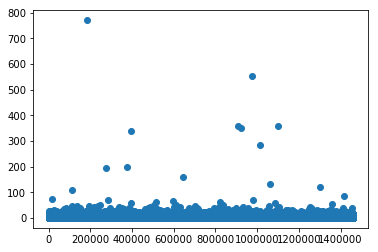

In [48]:
#lets also create a metric of average mph for the trip
df['mph']=df['distance_mi']/df['duration_hr']

#Lets do some further EDA, by visualizing distances in the data set
plt.scatter(range(len(df)),df.distance_mi)
plt.show()


In [49]:
#I'm highly doubtful that anyone took a cab that drove on average > 80 mph  Lets look at those as a subset
df_highspeed=df[df.mph >80]
#lets look at these
df_highspeed

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,duration_hr,distance_mi,mph
1107,id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,N,2,0.000556,0.437036,786.665094
13046,id3468323,1,2016-06-27 18:37:21,2016-06-27 18:43:16,1,-73.881195,40.882942,-73.965141,40.762486,N,355,0.098611,9.404876,95.373386
25397,id1957624,2,2016-03-27 16:28:42,2016-03-27 16:32:25,1,-74.069908,40.739052,-74.157913,40.712528,N,223,0.061944,4.969164,80.219682
39020,id2700498,2,2016-01-18 18:19:50,2016-01-18 18:20:06,1,-74.393555,40.785603,-74.398514,40.781822,N,16,0.004444,0.368375,82.884407
87582,id0508130,2,2016-04-30 00:00:51,2016-04-30 00:01:02,3,-74.000664,40.747410,-74.003189,40.743950,N,11,0.003056,0.273062,89.365605
107171,id1656254,2,2016-01-18 00:35:38,2016-01-18 00:35:54,1,-73.805527,40.651360,-73.804230,40.661629,N,16,0.004444,0.711859,160.168257
125668,id0456393,1,2016-04-27 06:59:15,2016-04-27 07:03:40,1,-73.979668,40.748005,-73.865097,40.683315,N,265,0.073611,7.490595,101.759031
127613,id1322914,2,2016-03-25 17:21:18,2016-03-25 17:21:27,1,-73.801102,40.669941,-73.801392,40.673851,N,9,0.002500,0.270231,108.092382
133641,id2362780,2,2016-06-30 05:01:03,2016-06-30 05:01:11,1,-74.164268,40.711639,-74.179352,40.711342,N,8,0.002222,0.792238,356.506966
156328,id0772531,2,2016-02-15 17:08:22,2016-02-15 17:08:42,1,-73.804169,40.662457,-73.807327,40.654495,N,20,0.005556,0.573867,103.296069


In [50]:
#Assuming that the trip duration value is more accurate than long and lat values (due to reliance on gps) any trip where the average speed was >80 mph most likely has a bad value in the coordinates
#lets remove these suspect values from the dataset
df_clean_speed=df[~df.index.isin(df_highspeed.index)]

In [51]:
#quick check that we eliminated those 129 rows
print(len(df)-len(df_clean_speed))

129


In [52]:
#lets now take a naive estimate of average mph based on partially cleaned dataset
average_mph=df_clean_speed.mph.mean()